Task definition

Although the problem of humiliating and slandering people through the Internet has existed almost as long as communication via the Internet between people, the appearance of new devices, such as smartphones and tablet computers, which allow using this medium not only at home, work or school but also in motion, has further exacerbated the problem. Especially recent decade, during which Social Networking Services (SNS), such as Facebook and Twitter, rapidly grew in popularity, has brought to light the problem of unethical behaviors in Internet environments, which has been greatly impairing public mental health in adults and, for the most, in younger users and children. It is the problem of cyberbullying (CB), defined as exploitation of open online means of communication, such as Internet forum boards, or SNS to convey harmful and disturbing information about private individuals, often children and students.

To deal with the problem, researchers around the world have started studying the problem of cyberbullying with a goal to automatically detect Internet entries containing harmful information, and report them to SNS service providers for further analysis and deletion. After ten years of research [1], a sufficient knowledge base on this problem has been collected for languages of well-developed countries, such as the US, or Japan. Unfortunately, still close to nothing in this matter has been done for the Polish language. With this task, we aim at filling this gap.

In this pilot task, the contestants will determine whether an Internet entry is classifiable as part of cyberbullying narration or not. The entries will contain tweets collected from openly available Twitter discussions. Since much of the problem of automatic cyberbullying detection often relies on feature selection and feature engineering [2], the tweets will be provided as such, with minimal preprocessing. The preprocessing, if used, will be applied mostly for cases when information about a private person is revealed to the public.

The goal of the contestants will be to classify the tweets into cyberbullying/harmful and non-cyberbullying/non-harmful with the highest possible Precision, Recall, balanced F-score and Accuracy. In an additional sub-task, the contestants will differentiate between various types of cyberbullying, i.e., revealing of private information, personal threats, blackmails, ridiculing, gossip/insinuations, or accumulation of vulgarities and profane language.

-----------

Task 6-2: Type of harmfulness

In this task, the participants shall distinguish between three classes of tweets: 0 (non-harmful), 1 (cyberbullying), 2 (hate-speech). There are various definitions of both cyberbullying and hate-speech, some of them even putting those two phenomena in the same group. The specific conditions on which we based our annotations for both cyberbullying and hate-speech, which have been worked out during ten years of research [1] will be summarized in an introductory paper for the task, however, the main and definitive condition to distinguish the two is whether the harmful action is addressed towards a private person(s) (cyberbullying), or a public person/entity/large group (hate-speech).

Task 6-2 training data: DOWNLOAD

Evaluation

File for evaluation should contain only tags (results of classification), one per line, aligned in the order corresponding to the order of sentences in test data (provided later). For evaluation use the attached Perl script in the following manner to calculate the results:

perl evaluate2.pl results.txt > output.txt

The Perl script calculates Micro-Average F-score (microF) and Macro-Average F-score (macroF). In choosing the winners we will look primarily microF to treat all instances equally since the number of instances is different for each class. Moreover, in the case of equal results for microF, the team with higher macroF will be chosen as the winner. The additional macroF, treating equally not all instances, but rather all classes, is used to provide additional insight into the results.
Test data

The test data is available here for DOWNLOAD.


In [1]:
train_path = 'data/train'
test_path = 'data/test'

In [2]:
import pandas as pd
import os
import re 

In [3]:
train = dict()
test = dict()

train['tags'] = pd.read_csv(os.path.join(train_path, 'training_set_clean_only_tags.txt'), header=None)
train['tags'].columns = ['label']

train['text'] = pd.read_table(os.path.join(train_path, 'training_set_clean_only_text.txt'), header=None)
train['text'].columns = ['text']


train['tags']['label_text'] = train['tags']['label'].map({0: "non-harmful",
                                                          1: "cyberbullying",
                                                          2: "hate-speech"})

df = pd.concat([train['tags'], train['text']], axis=1)

In [4]:
train = dict()
test = dict()

In [5]:
train['tags'] = pd.read_csv(os.path.join(train_path, 'training_set_clean_only_tags.txt'), header=None)
train['tags'].columns = ['label']

train['text'] = pd.read_table(os.path.join(train_path, 'training_set_clean_only_text.txt'), header=None)
train['text'].columns = ['text']

In [6]:
train['tags']['label_text'] = train['tags']['label'].map({0: "non-harmful",
                                                          1: "cyberbullying",
                                                          2: "hate-speech"})

In [7]:
df = pd.concat([train['tags'], train['text']], axis=1)

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib



/Users/ostyk/Desktop/agricola_moderna/env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


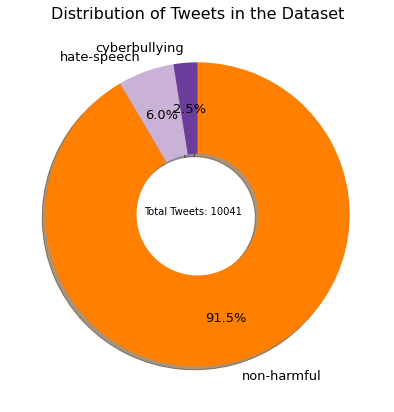

In [9]:
plt.figure(figsize = (7,7))
sorted_counts = df['label_text'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 13}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [10]:
s = df['text'].iloc[1]

# cleaning twitter 'handles'

In [11]:
def clean_text(pattern, text, tag):
    
    rgx_list = re.findall(pattern, text)
    
    new_text = text
    for rgx_match in rgx_list:
        new_text = re.sub(rgx_match, tag, new_text)
    return new_text

pattern =  '@[^\s]+'

In [12]:
df['text'] = df['text'].apply(lambda x: clean_text(pattern, x, '<TWITTER_HANDLE>'))

In [13]:


X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['label'], 
                                                    random_state=42)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))



Number of rows in the total set: 10041
Number of rows in the training set: 7530
Number of rows in the test set: 2511


In [14]:
polish_stopwords = open("data/polish.stopwords.txt").read().splitlines()
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = polish_stopwords, lowercase = True)

In [15]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = polish_stopwords, lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [16]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test, average='macro')

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train, average='macro')

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test,  average='macro')

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train,  average='macro')

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test,  average='macro')

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train,  average='macro')

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [18]:
# clf = make_pipeline(StandardScaler(),
#                     SGDClassifier(max_iter=1000, tol=1e-3))

In [19]:
#clf.fit(X_test, y_test)

In [20]:
# make a list of models
models = [MultinomialNB(),
          DecisionTreeClassifier(),
          LinearSVC(),
          AdaBoostClassifier(), 
          RandomForestClassifier(), 
          BaggingClassifier(),
          LogisticRegression(),
          SGDClassifier(),
          KNeighborsClassifier()]



In [21]:
re = pipeline(models, training_data, y_train, testing_data, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])


Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 1.17 sec
----------------------------------------------------
Training LinearSVC
Training LinearSVC finished in 0.32 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 0.34 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 3.00 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 6.93 sec
----------------------------------------------------
Training LogisticRegression


/Users/ostyk/Desktop/agricola_moderna/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training LogisticRegression finished in 0.78 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.04 sec
----------------------------------------------------
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.00 sec
----------------------------------------------------


/Users/ostyk/Desktop/agricola_moderna/env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [23]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,LinearSVC,0.926722,0.624510,0.441352,0.480668,0.000847,0.999336,0.999062,0.995048,0.997046,0.323010
1,SGDClassifier,0.924333,0.569197,0.445343,0.478896,0.001653,0.998805,0.998170,0.991805,0.994966,0.038130
2,DecisionTreeClassifier,0.913580,0.516217,0.457502,0.477800,0.011996,0.999867,0.999952,0.998291,0.999119,1.174412
3,LogisticRegression,0.929510,0.804155,0.422115,0.464487,0.001041,0.984329,0.992780,0.857699,0.915182,0.775481
4,MultinomialNB,0.927519,0.585955,0.397632,0.425921,0.001225,0.953121,0.921406,0.616013,0.704959,0.005442
5,BaggingClassifier,0.918359,0.511636,0.401999,0.424823,0.097689,0.984064,0.990939,0.873348,0.925700,6.928473
6,RandomForestClassifier,0.922342,0.645624,0.384614,0.408584,1.024520,0.999867,0.999952,0.998291,0.999119,2.998014
7,AdaBoostClassifier,0.915970,0.589329,0.348144,0.346918,0.068849,0.918725,0.753664,0.406749,0.440955,0.335131
8,KNeighborsClassifier,0.917563,0.305854,0.333333,0.319003,2.576505,0.915538,0.971816,0.341206,0.334179,0.001692


In [24]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.91358,0.305854,0.333333,0.319003,0.000847,0.915538,0.753664,0.341206,0.334179,0.001692
max,0.92951,0.804155,0.457502,0.480668,2.576505,0.999867,0.999952,0.998291,0.999119,6.928473


In [25]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]


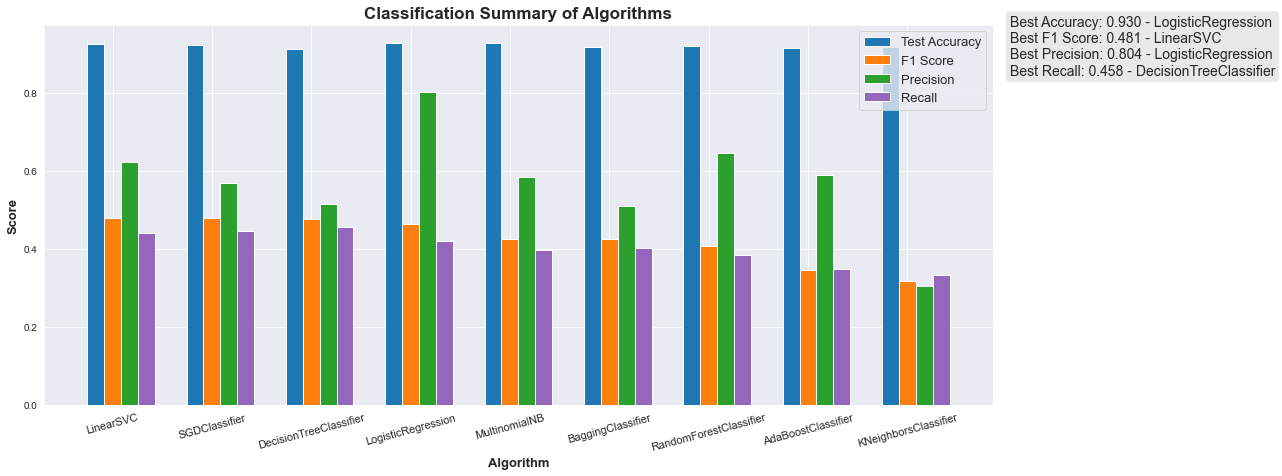

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [27]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

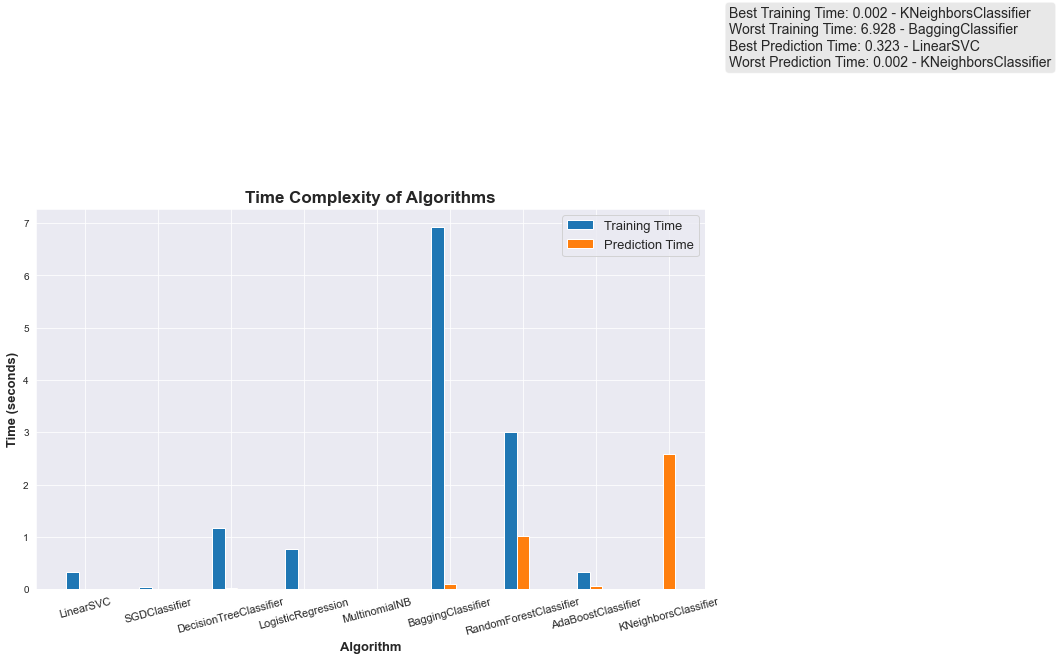

In [28]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9, 10, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

In [29]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score, average='macro')

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print("Best Parameters: {}".format(grid_fit.best_params_))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("F1-score: {:.4f}".format(f1_score(y_test, best_predictions, average='macro')))
    print("Precision: {:.4f}".format(precision_score(y_test, best_predictions, average='macro')))
    print("Recall: {:.4f}".format(recall_score(y_test, best_predictions, average='macro')))

In [30]:
X_test

5809    LUDZIE Z BYDGOSZCZY: NAJLEPSZA RESTAURACJA? Rt...
5938    <TWITTER_HANDLE> Stałam na zewnątrz, ale mam c...
2260    RT <TWITTER_HANDLE> Halicki: proszę nie mówić,...
8833    <TWITTER_HANDLE> <TWITTER_HANDLE> Czyli tylko ...
4513      <TWITTER_HANDLE> Już nic nie będzie takie samo.
                              ...                        
3723    Gdybyśmy wszyscy byli takimi mędrkami z mędrko...
9657    <TWITTER_HANDLE> Napisałam ale on nie odpisał,...
5549    <TWITTER_HANDLE> Ja mam wrażenie ze kiko niema...
8166    <TWITTER_HANDLE> <TWITTER_HANDLE> Przewodniczą...
8114    Krok na miarę jpk vat. Przychody z tyt VAT wzrosą
Name: text, Length: 2511, dtype: object

In [31]:
# Dict for parameters
param_grid = {
    'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

param_tuning(clf_sgd, param_grid, training_data, y_train, testing_data, y_test)



SGDClassifier

Optimized Model
------
Best Parameters: {'alpha': 0.0002, 'max_iter': 2500}
Accuracy: 0.9303
F1-score: 0.4911
Precision: 0.7257
Recall: 0.4447


In [33]:
# # Dict for parameters
# param_grid = {
#     'C': [1, 1.2, 1.3, 1.4]
# }

# clf_lr = LogisticRegression()

# param_tuning(clf_lr, param_grid, training_data, y_train, testing_data, y_test)

In [32]:
# param_grid = {
#     'min_samples_split': [2, 5, 8],
#     'min_samples_leaf': [1, 2, 5, 8]
# }

# clf_dt = DecisionTreeClassifier()

# param_tuning(clf_dt, param_grid, training_data, y_train, testing_data, y_test)


In [34]:


# param_grid = {
#     'min_samples_split': [2, 5, 8],
#     'min_samples_leaf': [1, 2, 5, 8]
# }

# clf_dt = DecisionTreeClassifier()

# param_tuning(clf_dt, param_grid, training_data, y_train, testing_data, y_test)



In [35]:
# param_grid = {
#     'C': [0.25, 0.5, 0.75, 1, 1.2]
# }

# clf_linsvc = LinearSVC()

# param_tuning(clf_linsvc, param_grid, training_data, y_train, testing_data, y_test)


In [36]:


filename = 'cb_sgd_final.sav'
joblib.dump(clf_sgd, filename)



['cb_sgd_final.sav']

In [46]:
import pickle

with open('finalized_model.pkl', 'wb') as fout:
    pickle.dump((clf_sgd, count_vector), fout)


In [37]:

import re

In [38]:
test = dict()
test_path = 'data/test'

test['tags'] = pd.read_csv(os.path.join(test_path, 'test_set_only_tags.txt'), header=None)
test['tags'].columns = ['label']

test['text'] = pd.read_table(os.path.join(test_path, 'test_set_only_text.txt'), header=None)
test['text'].columns = ['text']


test['tags']['label_text'] = test['tags']['label'].map({0: "non-harmful",
                                                          1: "cyberbullying",
                                                          2: "hate-speech"})

df = pd.concat([test['tags'], test['text']], axis=1)
# df['text'] = df['text'].apply(lambda x: clean_text(pattern, x, '<TWITTER_HANDLE>'))

# X_test = df['text']
# y_test = df['label']

In [39]:
df['text'] = df['text'].apply(lambda x: clean_text(pattern, x, '<TWITTER_HANDLE>'))

In [40]:
test_data = count_vector.transform(df['text'])

In [41]:
y_pred_test = clf_sgd.predict(test_data)

In [44]:
f1_score(y_pred_test, df['label'], average='macro')

0.37010659591304756

In [45]:
count_vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj',
                            'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż',
                            'bardziej', 'bardzo', 'beda', 'bedzie', 'bez',
                            'deda', 'będą', 'bede', 'będę', 'będzie', 'bo',
                            'bowiem', 'by', 'byc', 'być', 'byl', 'byla', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)